In [22]:
using Pkg
using ImageMagick
using Knet
using Images 
using Plots
using FileIO
using LinearAlgebra
using JLD
include(Knet.dir("data", "mnist.jl"))

In [23]:
# include(Knet.dir("data", "mnist.jl"))
# Centered Dataset
x_train, y_train, x_test, y_test = mnist();

┌ Info: Loading MNIST...
└ @ Main /home/ahnaf/.julia/packages/Knet/05UDD/data/mnist.jl:33


### Load previously saved data instances

In [ ]:
x_train_tx60 = load("x_train_tx60.jld2")["x_train_tx60"];
x_test_tx60 = load("x_test_tx60.jld2")["x_test_tx60"];

In [ ]:
x_train_tx100 = load("x_train_tx100.jld2")["x_train_tx100"];
x_test_tx100 = load("x_test_tx100.jld2")["x_test_tx100"];

In [ ]:
x_train_tc60 = load("x_train_tc60.jld2")["x_train_tc60"]
x_test_tc60 = load("x_test_tc60.jld2")["x_test_tc60"];

In [ ]:
x_train_tc100 = load("x_train_tc100.jld2")["x_train_tc100"];
x_test_tc100 = load("x_test_tc100.jld2")["x_test_tc100"];

## Data Generation Blocks
The following blocks all deal with Data Generation

In [24]:
# Function to translate Centered MNIST images to random positions in blank frame
# Requires the dataset and size of the blank frame. Assumes square frame for placement.
# Output dimensions of this function not consistent with input dataset sizes i.e N elements array of i,j,1
# Concatenation attempts here resulted in Stack Overflow error
# Function dim_reg used to divide N element array into subsets, concatenate each subset along 4 dimension
# push them into a new array and concatenate along 4th dimension again

function translate_image(dataset, frame_size)
    
#     idx = 10000   # Comment for using full dataset and uncomment below
    idx = size(dataset, 4)  # Uncomment for full dataset
    
    translated_set = []
    x_lim = frame_size - size(dataset, 1)
    y_lim = frame_size - size(dataset, 2)
        
    #Generating a blank patch
    patch_init::Array{Float16} =  zeros(frame_size, frame_size,1);
    
    for i = 1:idx
        patch_cl = deepcopy(patch_init)
        
        # Random indices for placing the centered MNIST image. Dataset dimensions (x,y,1,N)
        locx_im = rand(1:x_lim)
        locy_im = rand(1:y_lim)

        # Inserting original MNIST image.
        patch_cl[locx_im:locx_im + size(dataset,1)-1, locy_im:locy_im + size(dataset,1)-1,1] = (dataset[:,:,1,i]);
               
        # Shifting to new array
        push!(translated_set, patch_cl)
        if i == 60000 #final element check
            println(i)
        end
    end
       
    return translated_set;
end


translate_image (generic function with 1 method)

In [25]:
#Divides the input dataset into the number of sets, concatenates each subset along the 4 dimension, appends
# them into a new array and concatenates along the 4 dimension again

function dim_reg(dataset, sets)    
    new = Any[];
    set_size::Int = length(dataset) / sets;
    for  i = 1:sets
        first::Int = 1 + (i-1)*(length(dataset) / sets);
        last::Int = i * (length(dataset) / sets);
        subset = dataset[first:last];
        
        #println(size(subset))
        subset_new = cat(subset..., dims = 4)
        #println(size(subset_new));
        push!(new, subset_new);
    end
    new = cat(new..., dims = 4)
    return new;
end

dim_reg (generic function with 1 method)

# Regular translated MNIST (frame_size =  60 x 60)
## X_train

In [26]:
# X_train
# Translate_image takes arguments input datasets and frames-size for the blank frame
translated_set = translate_image(x_train, 60);

# Dimensional matching for x_train
x_train_tx60 = dim_reg(translated_set, 6);

# Check for output of the translation_fin
# Must be equal to frame_size x frame_size x 1 x N (N =  60000 for x_train)
println(size(x_train_tx60))

save("x_train_tx60.jld2", "x_train_tx60", x_train_tx60)

#Loading pre-saved datasets
# x_train_tx60 = load("x_train_tx60.jld")["x_train_tx60"];

60000
(60, 60, 1, 60000)


## X_test

In [27]:
# X_test
# Translate_image takes arguments input datasets and frames-size for the blank frame
translated_testset = translate_image(x_test, 60);

# Dimensional matching for x_train
x_test_tx60 = dim_reg(translated_testset, 2);

# Check for output of the translation_fin
# Must be equal to frame_size x frame_size x 1 x N (N = 10000 for x_test)
println(size(x_test_tx60))

save("x_test_tx60.jld2", "x_test_tx60", x_test_tx60)

#Loading pre-saved datasets
# x_test_tx60 = load("x_test_tx60.jld")["x_test_tx60"];

(60, 60, 1, 10000)


In [28]:
size(x_test_tx60)

(60, 60, 1, 10000)

# Regular translated MNIST (frame_size =  100 x 100)
## X_train

In [29]:
# X_train
# Translate_image takes arguments input datasets and frames-size for the blank frame
translated_set2 = translate_image(x_train, 100);

# Dimensional matching for x_train
x_train_tx100 = dim_reg(translated_set2, 10);

# Check for output of the translation_fin
# Must be equal to frame_size x frame_size x 1 x N (N =  60000 for x_train)
println(size(x_train_tx100))

save("x_train_tx100.jld2", "x_train_tx100", x_train_tx100)

#Loading Pre-saved datasets
# x_train_tx100 = load("x_train_tx100.jld")["x_train_tx100"];
println(size(x_train_tx100))

60000
(100, 100, 1, 60000)
(100, 100, 1, 60000)


### X_test


In [30]:
# X_test
# Translate_image takes arguments input datasets and frames-size for the blank frame
translated_testset = translate_image(x_test, 100);

# Dimensional matching for x_train
x_test_tx100 = dim_reg(translated_testset, 2);

# Check for output of the translation_fin
# Must be equal to frame_size x frame_size x 1 x N (N = 10000 for x_test)
println(size(x_test_tx100))

save("x_test_tx100.jld2", "x_test_tx100", x_test_tx100)

#Loading pre-saved Datasets
# x_test_tx100 = load("x_test_tx100.jld")["x_test_tx100"];
println(size(x_test_tx100))

(100, 100, 1, 10000)
(100, 100, 1, 10000)


# Translated and Cluttered MNIST

In [31]:
function clutter(dataset, sets, clt_size, clt_inst)
    
    set_size::Int = size(dataset, 4)/sets;
    set_fin = [];
    
    for i = 1:sets
        temp = clutter_set(dataset[:,:,:,1 + (i-1)*set_size : i*set_size], clt_size, clt_inst);
        push!(set_fin, temp);
    end

    cluttered_array = cat(set_fin..., dims = 4);
#     println(size(cluttered_array))
    
    return cluttered_array
end

clutter (generic function with 1 method)

In [32]:
# Introduces clutter in dataset
# Requires image, size of the clutter patch (square) and number of clutter patches to be introduced.

function clutter_set(dataset, clt_size, clt_inst)
       
    lim::Int = size(dataset, 4) # Uncomment for full dataset
    
#     size for testing
    clutter_array = []
            
    for idx = 1:lim  
        temp = deepcopy(dataset[:,:,:,idx]);

        for n = 1:clt_inst

            x = rand(1:28, clt_size);
            y = rand(1:28, clt_size);

            # Isolating clutter patch from Training set
            clutter = x_train[x, y, 1, rand(1:size(x_train, 4))];
#             println(size(clutter))

            # Generating indices for placing clutter
            x_cl, y_cl = rand(1:(size(dataset,1) - clt_size)), rand(1:(size(dataset,2) - clt_size));

            # Cluttering the patched image
            temp[x_cl:x_cl + size(clutter,1)-1, y_cl:y_cl + size(clutter,2)-1,:] = transpose(clutter);
#             println(size(dataset[:,:,:,idx]))

        end

    push!(clutter_array, temp) 

    end
       
    clutter_set = cat(clutter_array..., dims = 4)
#     println(size(clutter_set))
    
    return clutter_set
end

clutter_set (generic function with 1 method)

In [33]:
# Global Parameters for clutter
clutter_size = 8;
clutter_inst = 5;
sets = 5;

## X_train 60 x 60

In [34]:
@time x_train_tc60 = clutter(x_train_tx60, sets, clutter_size , clutter_inst);
save("x_train_tc60.jld2", "x_train_tc60", x_train_tc60)
# x_train_tc60 = load("x_train_tc60.jld")["x_train_tc60"];
println(size(x_train_tc60))

@time x_test_tc60 = clutter(x_test_tx60, sets, clutter_size , clutter_inst);
save("x_test_tc60.jld2", "x_test_tc60", x_test_tc60)
# x_test_tc60 = load("x_test_tc60.jld")["x_test_tc60"];
println(size(x_test_tc60))

 48.413687 seconds (371.64 M allocations: 26.731 GiB, 51.09% gc time)
(60, 60, 1, 60000)
  2.107632 seconds (11.79 M allocations: 1.087 GiB, 46.38% gc time)
(60, 60, 1, 10000)


## X_train 100 x 100

In [35]:
@time x_train_tc100 = clutter(x_train_tx100, sets, clutter_size , clutter_inst);
save("x_train_tc100.jld2", "x_train_tc100", x_train_tc100)
# x_train_tc100 = load("x_train_tc100.jld")["x_train_tc100"];
println(size(x_train_tc100))

@time x_test_tc100 = clutter(x_test_tx100, sets, clutter_size , clutter_inst);
save("x_test_tc100.jld2", "x_test_tc100", x_test_tc100)
# x_test_tc100 = load("x_test_tc100.jld")["x_test_tc100"];
println(size(x_test_tc100))

 49.395129 seconds (370.76 M allocations: 30.255 GiB, 49.88% gc time)
(100, 100, 1, 60000)
  5.930191 seconds (11.79 M allocations: 1.681 GiB, 76.82% gc time)
(100, 100, 1, 10000)


# Data Visualization
## Random Data samples 

In [36]:
idx = rand(1:6000, 5);

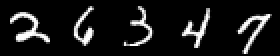

In [37]:
hcat([mnistview(x_train,i) for i in idx]...)

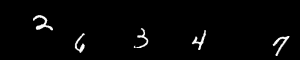

In [38]:
hcat([mnistview(x_train_tx60,i) for i in idx]...)

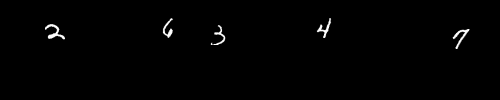

In [39]:
hcat([mnistview(x_train_tx100,i) for i in idx]...)

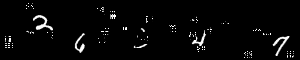

In [40]:
hcat([mnistview(x_train_tc60,i) for i in idx]...)

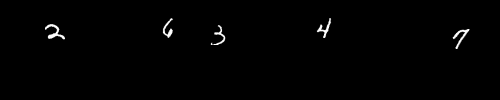

In [41]:
hcat([mnistview(x_train_tx100,i) for i in idx]...)

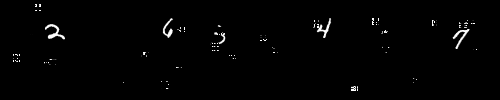

In [42]:
hcat([mnistview(x_train_tc100,i) for i in idx]...)